LUKŠA ANDRAČIĆ
LV2 - STATISTIČKO ZAKLJUČIVANJE
06.11.2024.

Svrha labaratorijske vježbe je uvježbati osnovne tehnike parametarskog i neparametoraskog zaključivanja. Uvježbati ćemo primjene različitih metoda zaključivanja na jednoj/dvije varijable i provesti testiranja hipoteza o distribucijama i srednjim vrijednostima.

1. Zadatak: Analiza hormona

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Učitavanje podataka iz CSV datoteke
file_path = '/content/hormon.csv'
data_hormon = pd.read_csv(file_path, delimiter=';', encoding='latin1')

# Zamjena decimalnog separatora i pretvaranje u float za stupac 'somatZ'
data_hormon['somatZ'] = data_hormon['somatZ'].str.replace(',', '.').astype(float)

# Čišćenje podataka: uklanjanje redaka s nedostajućim vrijednostima za 'somatZ'
data_hormon_clean = data_hormon.dropna(subset=['somatZ'])

# Uklanjanje nepoželjnih znakova iz naziva stupaca
data_hormon_clean.columns = [col.strip(',') for col in data_hormon_clean.columns]

# Prikaz prvih nekoliko redaka očišćenog skupa podataka
print("Prvih nekoliko redaka očišćenih podataka:")
print(data_hormon_clean.head())

# Informacije o datasetu
print("\nInformacije o datasetu nakon čišćenja:")
print(data_hormon_clean.info())





FileNotFoundError: [Errno 2] No such file or directory: '/content/hormon.csv'

Varijabla koju analiziramo je somatZ, vrsta podatka je float64.

In [8]:
# Izračunavanje intervala povjerenja za 99% razinu pouzdanosti
razina_pouzdanosti = 0.99
alfa = 1 - razina_pouzdanosti
t_vrijednost = stats.t.ppf(1 - alfa / 2, len(data_hormon_clean['somatZ']) - 1)
margina_pogreške = t_vrijednost * (np.std(data_hormon_clean['somatZ']) / np.sqrt(len(data_hormon_clean['somatZ'])))
donja_granica = np.mean(data_hormon_clean['somatZ']) - margina_pogreške
gornja_granica = np.mean(data_hormon_clean['somatZ']) + margina_pogreške
print(f"99% interval povjerenja: ({donja_granica:.2f}, {gornja_granica:.2f})")

# Test normalnosti Shapiro-Wilk testom
shapiro_stat, shapiro_p = stats.shapiro(data_hormon_clean['somatZ'])
print(f"Shapiro-Wilk test: stat={shapiro_stat:.3f}, p={shapiro_p:.3f}")

# Usporedba između muškaraca i žena korištenjem Mann-Whitney U testa
group_men = data_hormon_clean[data_hormon_clean['spol'] == 'm']['somatZ'].values
group_women = data_hormon_clean[data_hormon_clean['spol'] == 'z']['somatZ'].values
mann_stat, mann_p = stats.mannwhitneyu(group_men, group_women)
print(f"Mann-Whitney U test (muškarci vs žene): stat={mann_stat:.3f}, p={mann_p:.3f}")

# Usporedba između pušača i nepušača korištenjem Mann-Whitney U testa
group_smoke = data_hormon_clean[data_hormon_clean['pusenje'] == 1]['somatZ']
group_nonsmoke = data_hormon_clean[data_hormon_clean['pusenje'] == 0]['somatZ']
mann_smoke_stat, mann_smoke_p = stats.mannwhitneyu(group_smoke, group_nonsmoke)
print(f"Mann-Whitney U test (pušači vs nepušači): stat={mann_smoke_stat:.3f}, p={mann_smoke_p:.3f}")


99% interval povjerenja: (12.46, 30.15)
Shapiro-Wilk test: stat=0.584, p=0.000
Mann-Whitney U test (muškarci vs žene): stat=799.000, p=0.846
Mann-Whitney U test (pušači vs nepušači): stat=887.000, p=0.523


99% interval procjene nam govori da će se u tom intrevalu sa 99% sigurnosti pronaći srednja vrijednost skupa iz koje je uzorak uzet.

Shapirko-wilk test nam daje informaciju da podaci nisu noramlno raspoređeni te ćemo koristiti neparametrijske metode,  to saznajemo iz pvalue koji je puno manji od 0.05. Mann-Whitneyevim U testom ispitujemo hoćemo li zadržati ili odbaciti nultu hipotezu.
Nemožemo odbaciti nultu hipotezu.


2. Zadatak: Analiza navika čitanja

In [ ]:
data_books = pd.read_csv('/content/sample_data/knjiga.csv', delimiter=';', encoding='latin1')
print(data_books.head())
print(data_books.info())

group_men = data_books[data_books['spol'] == 'm']['spol']
group_women = data_books[data_books['spol'] == 'z']['spol']

group_reading = data_books[data_books['citanje']==1]['citanje']
group_not_reading = data_books[data_books['citanje']==0]['citanje']

group_sss = data_books[data_books['obrazovanje'] == 'SSS']['obrazovanje'].values
group_nss = data_books[data_books['obrazovanje'] == 'NSS']['obrazovanje'].values
group_vss = data_books[data_books['obrazovanje'] == 'VSS']['obrazovanje'].values





   citanje spol obrazovanje
0        0    Z         SSS
1        0    M         SSS
2        1    Z         NSS
3        1    Z         VSS
4        0    Z         NSS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   citanje      744 non-null    int64 
 1   spol         744 non-null    object
 2   obrazovanje  744 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.6+ KB
None


Chi-square test rezultati: {'Chi-square statistic': 7.526497823468092, 'p-value': 0.0060797983853609705, 'Degrees of freedom': 1}


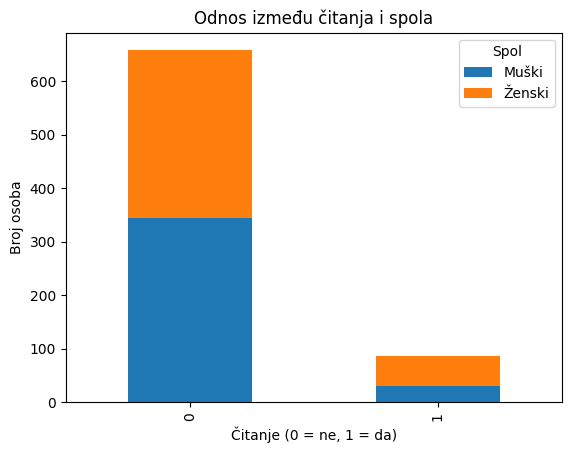

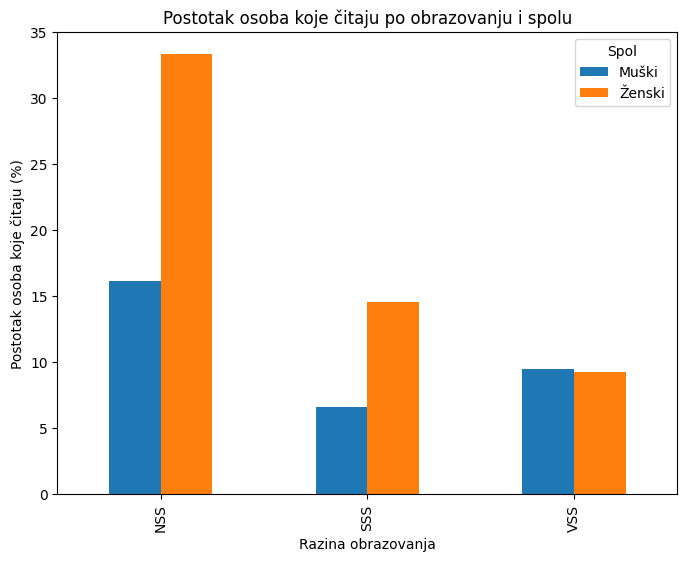

Postotak osoba koje čitaju po obrazovanju i spolu:
 spol                 M          Z
obrazovanje                      
NSS          16.129032  33.333333
SSS           6.550218  14.516129
VSS           9.482759   9.195402


In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Učitavanje podataka s ispravnim separatorom
file_path = '/content/knjiga.csv'
data = pd.read_csv(file_path, sep=';')

# Analiza odnosa između čitanja i spola
citanje_spol = pd.crosstab(data['citanje'], data['spol'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(citanje_spol)

# Rezultati Chi-square testa
chi2_result = {
    "Chi-square statistic": chi2,
    "p-value": p,
    "Degrees of freedom": dof
}
print("Chi-square test rezultati:", chi2_result)

# Vizualizacija: Stupčasti dijagram za odnos između čitanja i spola
citanje_spol.plot(kind='bar', stacked=True)
plt.title("Odnos između čitanja i spola")
plt.xlabel("Čitanje (0 = ne, 1 = da)")
plt.ylabel("Broj osoba")
plt.legend(title="Spol", labels=["Muški", "Ženski"])
plt.show()

# Analiza utjecaja obrazovanja na čitanje
obrazovanje_spol_citanje = data.groupby(['obrazovanje', 'spol'])['citanje'].mean() * 100
obrazovanje_spol_citanje = obrazovanje_spol_citanje.unstack()

# Vizualizacija: Postotak osoba koje čitaju po obrazovanju i spolu
obrazovanje_spol_citanje.plot(kind='bar', figsize=(8, 6))
plt.title("Postotak osoba koje čitaju po obrazovanju i spolu")
plt.xlabel("Razina obrazovanja")
plt.ylabel("Postotak osoba koje čitaju (%)")
plt.legend(title="Spol", labels=["Muški", "Ženski"])
plt.show()

# Prikaz podataka za postotke
print("Postotak osoba koje čitaju po obrazovanju i spolu:\n", obrazovanje_spol_citanje)

S obzirom na to da je p-vrijednost manja od 0.05, možemo zaključiti da postoji značajna razlika u navikama čitanja između muškaraca i žena.

Prvi dijagram prikazuje distribuciju čitanja među muškarcima i ženama. Iz rezultata je vidljivo da žene češće čitaju u odnosu na muškarce.

Iz drugog dijagrama možemo zaključiti da:
-Među osobama s nižom srednjom školom (NSS), žene imaju značajno veći postotak (33.33%) čitanja u odnosu na muškarce (16.13%)
-Među osobama sa srednjom školom (SSS), žene također češće čitaju (14.52%) u odnosu na muškarce (6.55%)
-Kod osoba s visokom školom ili fakultetom (VSS), razlike su male: 9.48% za muškarce i 9.20% za žene